In [1]:
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pathlib import Path

In [2]:
#load and read 2015 merged file
csv_file = Path("Resources/2015_Life_happiness_mergedupdate.csv")
life_happiness_df = pd.read_csv(csv_file)
life_happiness_df.head()

,Unnamed: 0,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,Afghanistan,3.794,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,Albania,4.644,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
2,2,Algeria,5.872,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
3,3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
4,4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


In [3]:
#create a reduced df for the required columns
social_freedom_df = life_happiness_df[["Country", "continent", "happiness_score", "family", "freedom", "Life expectancy "]].copy()
social_freedom_df = social_freedom_df.dropna(how="any")

#save this reduced df for use on other workbooks
social_freedom_df.to_csv("Resources/PB_support_freedom.csv", index=False, header=True)
social_freedom_df


,Country,continent,happiness_score,family,freedom,Life expectancy
0,Afghanistan,Asia,3.794,0.581543,0.106180,65.0
1,Albania,Europe,4.644,0.803685,0.381499,77.8
2,Algeria,Africa,5.872,1.146217,0.233336,75.6
5,Argentina,South America,6.599,1.440451,0.494519,76.3
6,Armenia,Asia,4.376,1.007484,0.198303,74.8
...,...,...,...,...,...,...
175,Uruguay,South America,6.454,1.412228,0.579392,77.0
176,Uzbekistan,Asia,5.971,1.548969,0.658249,69.4
180,Yemen,Asia,3.593,0.935382,0.249464,65.7
181,Zambia,Africa,4.514,1.003187,0.461603,61.8


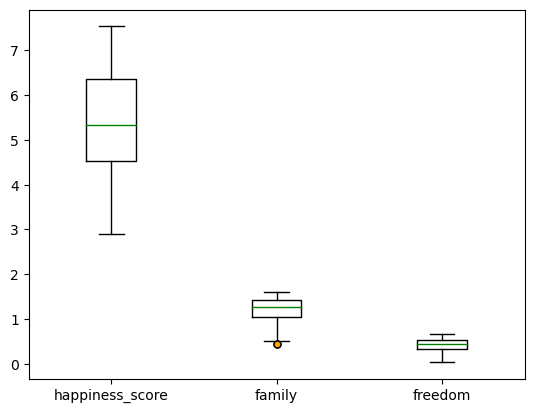

In [4]:
#Boxplot for all 122 countries

#styling
outlier =dict(marker="o", markerfacecolor="orange", markersize=5, markeredgecolor="black")
boxplot = dict(color='black')
median = dict(color="green")
whiskers = dict(color="black")
caps = dict(color="black")

#plot
ax = social_freedom_df[['happiness_score', 'family', 'freedom']].plot(kind="box", flierprops=outlier, boxprops=boxplot, medianprops=median, whiskerprops=whiskers, capprops=caps)

plt.show()


In [5]:
#list of continents for for loop
continents = social_freedom_df["continent"].unique()
continent_list = [i for i in continents]
print(continent_list)

continent_results = []

['Asia', 'Europe', 'Africa', 'South America', 'Australia', 'North America']


Happiness Outliers for Asia: Series([], Name: happiness_score, dtype: float64)
Family Outliers for Asia: 61    0.570615
0     0.581543
Name: family, dtype: float64
Freedom Outliers for Asia: 0    0.10618
Name: freedom, dtype: float64
Country count is 122


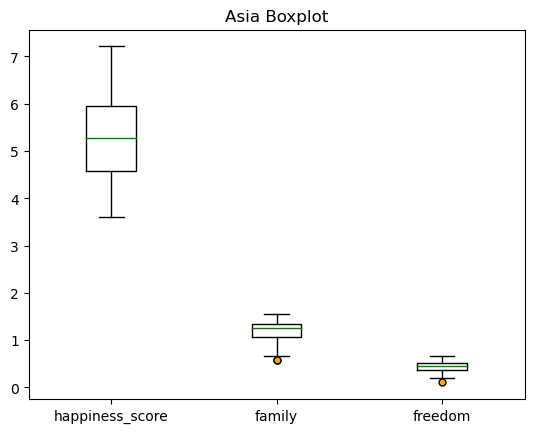

Happiness Outliers for Europe: Series([], Name: happiness_score, dtype: float64)
Family Outliers for Europe: 40     0.967983
1      0.803685
20     1.069336
132    1.150091
Name: family, dtype: float64
Freedom Outliers for Europe: Series([], Name: freedom, dtype: float64)
Country count is 122


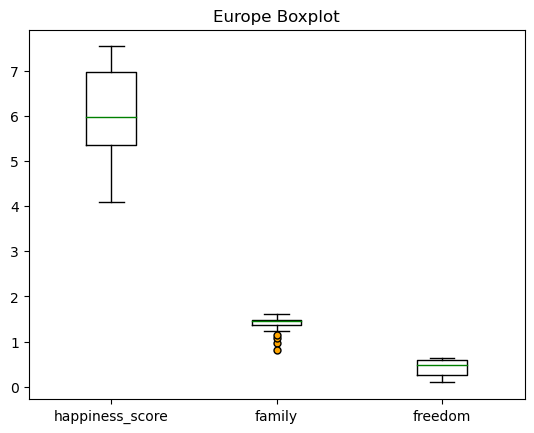

Happiness Outliers for Africa: Series([], Name: happiness_score, dtype: float64)
Family Outliers for Africa: Series([], Name: family, dtype: float64)
Freedom Outliers for Africa: 103    0.096098
26     0.059901
Name: freedom, dtype: float64
Country count is 122


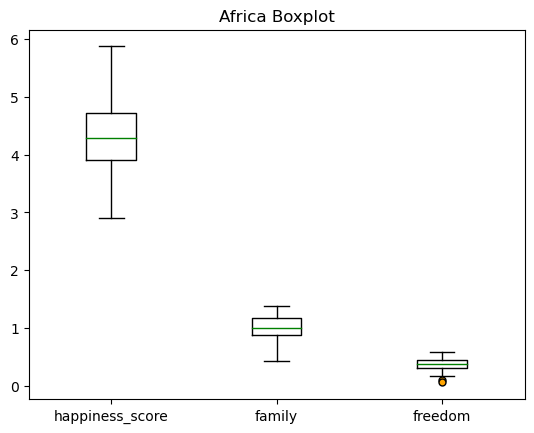

Happiness Outliers for South America: 70    3.603
67    3.507
Name: happiness_score, dtype: float64
Family Outliers for South America: 70    0.640450
67    0.791245
Name: family, dtype: float64
Freedom Outliers for South America: 70    0.03037
Name: freedom, dtype: float64
Country count is 122


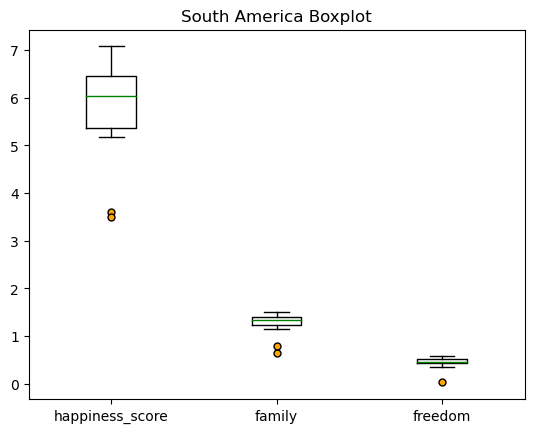

Happiness Outliers for Australia: Series([], Name: happiness_score, dtype: float64)
Family Outliers for Australia: Series([], Name: family, dtype: float64)
Freedom Outliers for Australia: Series([], Name: freedom, dtype: float64)
Country count is 122


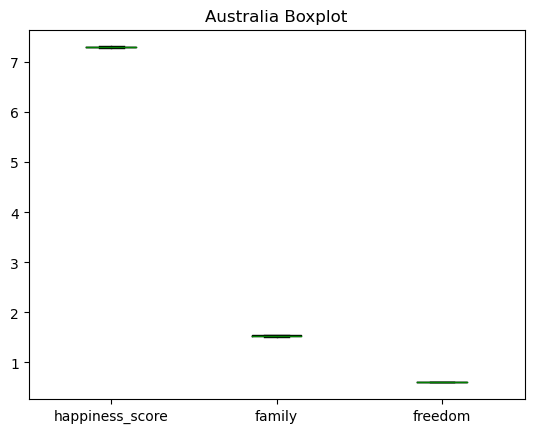

Happiness Outliers for North America: Series([], Name: happiness_score, dtype: float64)
Family Outliers for North America: Series([], Name: family, dtype: float64)
Freedom Outliers for North America: Series([], Name: freedom, dtype: float64)
Country count is 122


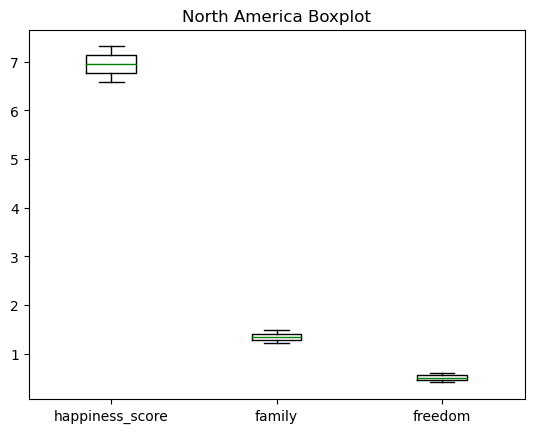

In [22]:
#Boxplot for each continent, using for loop

#styling
outlier =dict(marker="o", markerfacecolor="orange", markersize=5, markeredgecolor="black")
boxplot = dict(color='black')
median = dict(color="green")
whiskers = dict(color="black")
caps = dict(color="black")



#run for loop on each continent from list
for x in continent_list:
    #locate rows for each continent and plot
    continent_df = social_freedom_df.loc[social_freedom_df["continent"] == x]
    ax = continent_df[['happiness_score', 'family', 'freedom']].plot(kind="box", flierprops=outlier, boxprops=boxplot, medianprops=median, 
                                                                         whiskerprops=whiskers, capprops=caps, title=(f'{x} Boxplot'))
    
    #needs to be for x
    # #country_count = social_freedom_df["Country"].nunique()

    #run calcs for IQR

    #Happiness Score
    happy_subset = continent_df['happiness_score']
    happy_quartiles = happy_subset.quantile([0.25,0.5,0.75])
    happy_lowerq = happy_quartiles[0.25]
    happy_upperq = happy_quartiles[0.75]
    happy_iqr = happy_upperq - happy_lowerq
    happy_lower_bound = happy_lowerq - (1.5*happy_iqr)
    happy_upper_bound = happy_upperq + (1.5*happy_iqr)
    happy_outliers = (happy_subset.loc[(happy_subset < happy_lower_bound) | (happy_subset > happy_upper_bound)])
    print(f"Happiness Outliers for {x}: {happy_outliers}")
    
    #Family/Support portion of score
    family_subset = continent_df['family']
    family_quartiles = family_subset.quantile([0.25,0.5,0.75])
    family_lowerq = family_quartiles[0.25]
    family_upperq = family_quartiles[0.75]
    family_iqr = family_upperq - family_lowerq
    family_lower_bound = family_lowerq - (1.5*family_iqr)
    family_upper_bound = family_upperq + (1.5*family_iqr)
    family_outliers = (family_subset.loc[(family_subset < family_lower_bound) | (family_subset > family_upper_bound)])
    print(f"Family Outliers for {x}: {family_outliers}")

    #Freedom portion of score
    freedom_subset = continent_df['freedom']
    freedom_quartiles = freedom_subset.quantile([0.25,0.5,0.75])
    freedom_lowerq = freedom_quartiles[0.25]
    freedom_upperq = freedom_quartiles[0.75]
    freedom_iqr = freedom_upperq - freedom_lowerq
    freedom_lower_bound = freedom_lowerq - (1.5*freedom_iqr)
    freedom_upper_bound = freedom_upperq + (1.5*freedom_iqr)
    freedom_outliers = (freedom_subset.loc[(freedom_subset < freedom_lower_bound) | (freedom_subset > freedom_upper_bound)])
    print(f"Freedom Outliers for {x}: {freedom_outliers}")


    #print(f'Country count is {country_count}')
    plt.show()



In [7]:
#add columns for percentage of happiness score based on support or freedom
social_freedom_df["% of Happiness from Support"] = (social_freedom_df["family"] / social_freedom_df["happiness_score"]) * 100
social_freedom_df["% of Happiness from Freedom"] = (social_freedom_df["freedom"] / social_freedom_df["happiness_score"]) * 100
social_freedom_df.head()

,Country,continent,happiness_score,family,freedom,Life expectancy,% of Happiness from Support,% of Happiness from Freedom
0,Afghanistan,Asia,3.794,0.581543,0.106180,65.0,15.327974,2.798617
1,Albania,Europe,4.644,0.803685,0.381499,77.8,17.305884,8.214871
2,Algeria,Africa,5.872,1.146217,0.233336,75.6,19.520051,3.973702
5,Argentina,South America,6.599,1.440451,0.494519,76.3,21.828325,7.493851
6,Armenia,Asia,4.376,1.007484,0.198303,74.8,23.022937,4.531610


In [30]:
#sort in order of happiness score, low to high, eg happiest to saddest
happy_social_freedom_df = social_freedom_df.sort_values("happiness_score", ascending=False)
#happy_social_freedom_df.head()

#sort in order of life expectancy, low to high, eg happiest to saddest
life_social_freedom_df = social_freedom_df.sort_values("Life expectancy ", ascending=False)
#life_social_freedom_df.head()

happy = happy_social_freedom_df["happiness_score"]
happy_country = happy_social_freedom_df["Country"]

life = life_social_freedom_df["Life expectancy "]
life_country = life_social_freedom_df["Country"]


The r-value of Support is: 0.03487025036123003


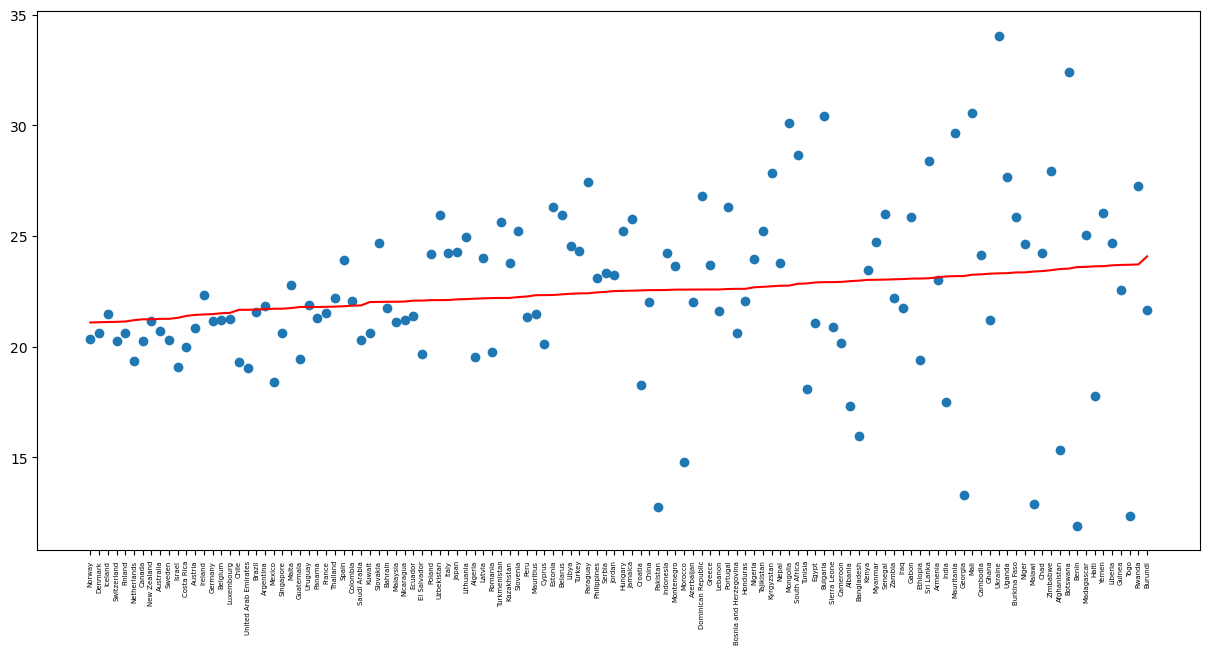

In [27]:
#scatter plot and line regression
#does getting more happiness from family and social connections correlate to a higher happiness score

#axis
x_support_percent = happy_social_freedom_df["Country"]
y_support_percent = happy_social_freedom_df["% of Happiness from Support"]

#data points
#happy = happy_social_freedom_df["happiness_score"]
#country = happy_social_freedom_df["Country"]

#line regression and line equation
sup_slope, sup_int, sup_r, sup_p, sup_std_err = st.linregress(happy, y_support_percent)
sup_fit = sup_slope * happy + sup_int

#increase plot size for large number of countries
size = plt.figure()
size.set_figwidth(15)
size.set_figheight(7)

#plot scatter & line regression
plt.scatter(x_support_percent, y_support_percent)
plt.plot(x_support_percent, sup_fit, color='red')

#style xticks
plt.xticks(happy_country, size=5, rotation=90)

#print r-value for analysis
print(f'The r-value of Support is: {sup_r**2}')

plt.show()
   

In [23]:
#test with happiness score instead of country

#scatter plot and line regression
#does getting more happiness from family and social connections correlate to a higher happiness score

#axis
#x_support_percent = social_freedom_df["happiness_score"]
#y_support_percent = social_freedom_df["% of Happiness from Support"]

#data points
#happy = social_freedom_df["happiness_score"]
#country = social_freedom_df["Country"]

#line regression and line equation
#sup_slope, sup_int, sup_r, sup_p, sup_std_err = st.linregress(x_support_percent, y_support_percent)
#sup_fit = sup_slope * x_support_percent + sup_int

#increase plot size for large number of countries
#size = plt.figure()
#size.set_figwidth(15)
#size.set_figheight(7)

#plot scatter & line regression
#plt.scatter(x_support_percent, y_support_percent)
#plt.plot(x_support_percent, sup_fit, color='red')

#style xticks
#plt.xticks(size=5, rotation=90)

#print r-value for analysis
#print(f'The r-value of Support is: {sup_r**2}')

#plt.show()

The r-value of freedom is: 0.003299615432309994


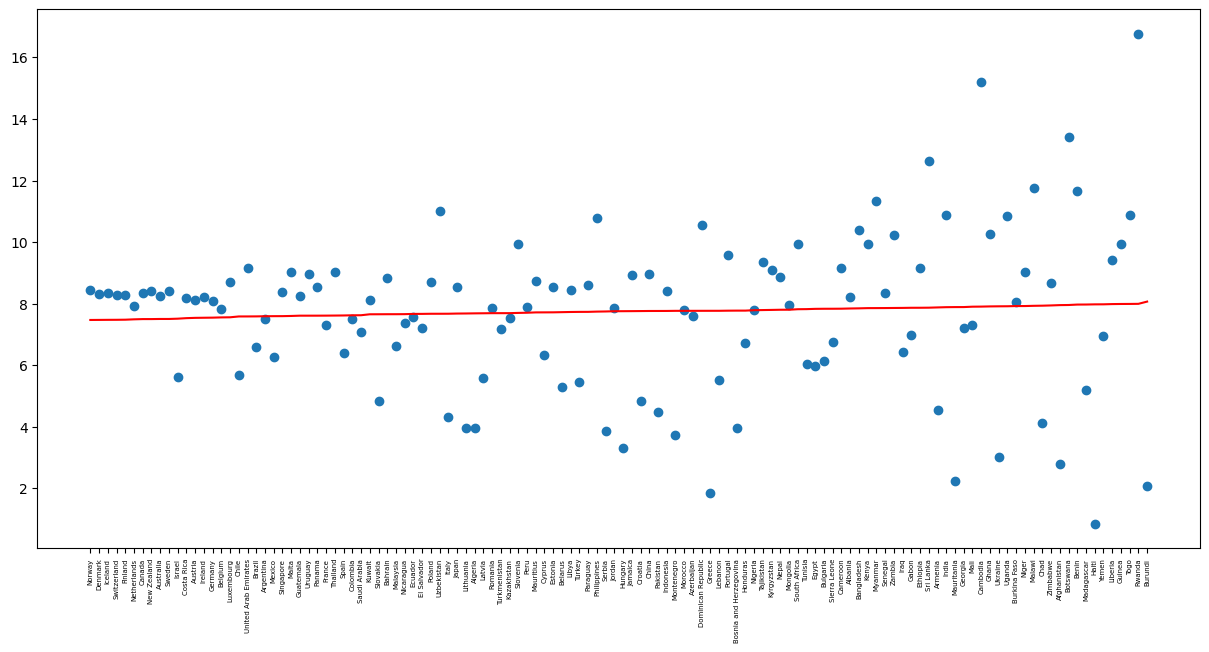

In [28]:
#scatter plot and line regression
#does getting more freedom to make life correlate to a higher happiness score

#axis
x_freedom_percent = happy_social_freedom_df["Country"]
y_freedom_percent = happy_social_freedom_df["% of Happiness from Freedom"]

#data points
#happy = happy_social_freedom_df["happiness_score"]
#country = social_freedom_df["Country"]

#line regression and line equation
free_slope, free_int, free_r, free_p, free_std_err = st.linregress(happy, y_freedom_percent)
free_fit = free_slope * happy + free_int

#increase plot size for volume of x-axis values
size = plt.figure()
size.set_figwidth(15)
size.set_figheight(7)

#plot scatter and line regression
plt.scatter(x_freedom_percent, y_freedom_percent)
plt.plot(x_freedom_percent, free_fit, color='red')

#style xticks
plt.xticks(happy_country, size=5, rotation=90)

#print r-value for analysis
print(f'The r-value of freedom is: {free_r**2}')

plt.show()


In [29]:
#social_freedom_df = social_freedom_df.sort_values("Life expectancy ", ascending=False)
#social_freedom_df.head()

The r-value of Support is: 0.013379892556025794


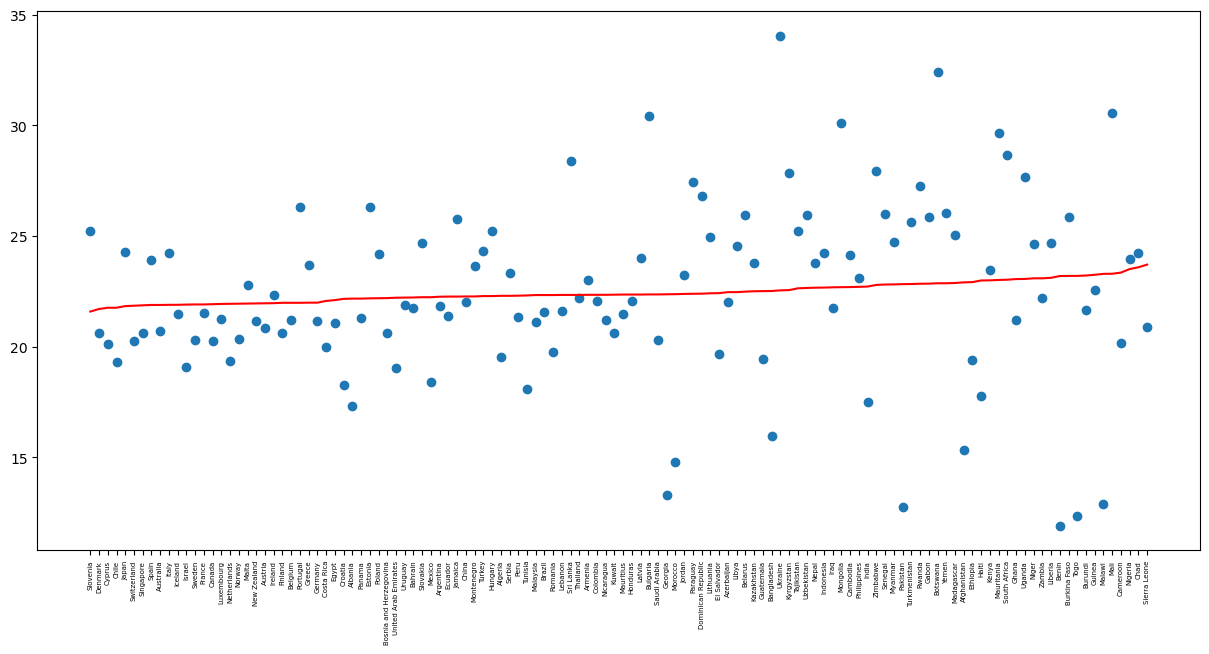

In [31]:
#scatter plot and line regression
#does getting more happiness from family and social connections correlate to a greater life expectancy

#axis
x_support_percent = life_social_freedom_df["Country"]
y_support_percent = life_social_freedom_df["% of Happiness from Support"]

#data points
#life = social_freedom_df["Life expectancy "]
#country = social_freedom_df["Country"]

#line regression and line equation
sup_slope, sup_int, sup_r, sup_p, sup_std_err = st.linregress(life, y_support_percent)
sup_fit = sup_slope * life + sup_int

#increase plot size to accommodate all countries
size = plt.figure()
size.set_figwidth(15)
size.set_figheight(7)

#plot scatter and line regression
plt.scatter(x_support_percent, y_support_percent)
plt.plot(x_support_percent, sup_fit, color='red')

#style xticks
plt.xticks(life_country, size=5, rotation=90)

#print r-value for analysis
print(f'The r-value of Support is: {sup_r**2}')

plt.show()

The r-value of Support is: 0.015646444375534092


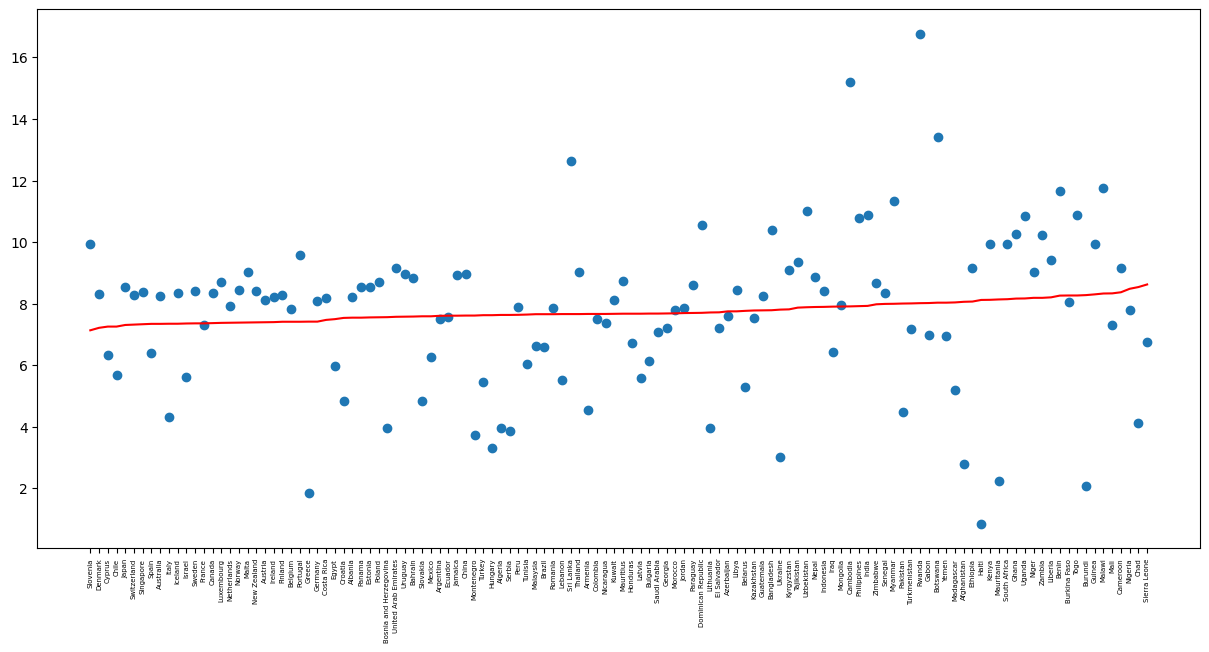

In [32]:
#scatter plot and line regression
#does getting more freedom to make life decisions correlate to a greater life expectancy

#axis
x_freedom_percent = life_social_freedom_df["Country"]
y_freedom_percent = life_social_freedom_df["% of Happiness from Freedom"]

#data points
#life = social_freedom_df["Life expectancy "]
#country = social_freedom_df["Country"]

#line regression and line equation
free_slope, free_int, free_r, free_p, free_std_err = st.linregress(life, y_freedom_percent)
free_fit = free_slope * life + free_int

#increase plot size to accommodate all countries
size = plt.figure()
size.set_figwidth(15)
size.set_figheight(7)

#plot scatter and line regression
plt.scatter(x_freedom_percent, y_freedom_percent)
plt.plot(x_freedom_percent, free_fit, color='red')

#style xticks
plt.xticks(life_country, size=5, rotation=90)

#print r-value for analysis
print(f'The r-value of Support is: {free_r**2}')

plt.show()

In [37]:
#isolate top 20 countries
top_life_20 = social_freedom_df.head(20)
top_life_20

,Country,continent,happiness_score,family,freedom,Life expectancy,% of Happiness from Support,% of Happiness from Freedom
146,Slovenia,Europe,5.758,1.452519,0.572576,88.0,25.226100,9.944005
46,Denmark,Europe,7.522,1.551122,0.626007,86.0,20.621133,8.322344
42,Cyprus,Asia,5.621,1.131363,0.355112,85.0,20.127438,6.317587
34,Chile,South America,6.652,1.284025,0.376895,85.0,19.302841,5.665894
82,Japan,Asia,5.920,1.436338,0.505626,83.7,24.262463,8.540972
157,Switzerland,Europe,7.494,1.516912,0.620071,83.4,20.241683,8.274227
144,Singapore,Asia,6.572,1.353814,0.549841,83.1,20.599732,8.366412
151,Spain,Europe,6.403,1.532091,0.408781,82.8,23.927705,6.384214
7,Australia,Australia,7.284,1.510042,0.601607,82.8,20.730944,8.259300
80,Italy,Europe,5.964,1.444923,0.256451,82.7,24.227418,4.299978


The r-value of Support in the Top 20 Happiest Countries is: 0.4083405250196487


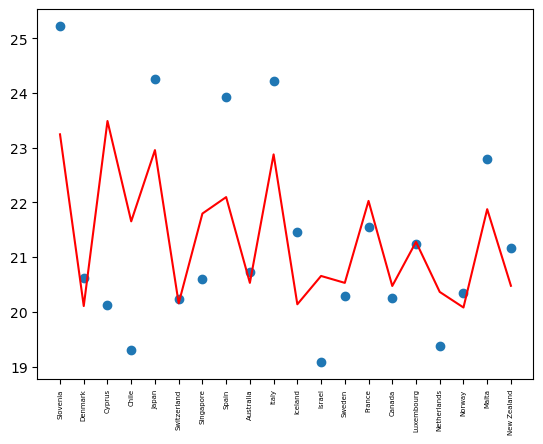

In [40]:
#scatter plots and line regression on top 20 happiest countries
#does getting more happiness from family and social connections correlate to a higher happiness score

#axis
x_support_top20 = top_life_20["Country"]
y_support_top20 = top_life_20["% of Happiness from Support"]

#data points
happy_20 = top_life_20["happiness_score"]
country_20 = top_life_20["Country"]

#line regression and line equation
sup20_slope, sup20_int, sup20_r, sup20_p, sup20_std_err = st.linregress(happy_20, y_support_top20)
sup20_fit = sup20_slope * happy_20 + sup20_int

#plot scatter and line regression
plt.scatter(x_support_top20, y_support_top20)
plt.plot(x_support_top20, sup20_fit, color='red')

#style xticks
plt.xticks(country_20, size=5, rotation=90)

#print r-values for analysis
print(f'The r-value of Support in the Top 20 Happiest Countries is: {sup20_r**2}')

plt.show()


In [33]:
#scatter plots and line regression on top 20 happiest countries
#does getting more happiness from freedom to make life decisions correlate to a higher happiness score

#axis
x_freedom_top20 = top_20["Country"]
y_freedom_top20 = top_20["% of Happiness from Freedom"]

#data points
happy_20 = top_20["happiness_score"]
country = top_20["Country"]

#line regression and line equation
free20_slope, free20_int, free20_r, free20_p, free20_std_err = st.linregress(happy_20, y_freedom_top20)
free20_fit = free20_slope * happy + free20_int

#plot scatter and line regression
plt.scatter(x_freedom_top20, y_freedom_top20)
plt.plot(x_freedom_top20, free20_fit, color='red')

#style xticks
plt.xticks(country, size=5, rotation=90)

#print r-values for analysis
print(f'The r-value of Freedom in the Top 20 Happiest Countries is: {sup20_r**2}')

plt.show()

NameError: name 'top_20' is not defined

In [64]:
#isolate bottom 20 countries, eg those with the lowest happiness score
bottom_20 = social_freedom_df.tail(20)
bottom_20

,Country,continent,happiness_score,family,freedom,Life expectancy,% of Happiness from Support,% of Happiness from Freedom
29,Cambodia,Asia,4.168,1.006238,0.633376,68.7,24.141993,15.196156
63,Ghana,Africa,4.120,0.873665,0.423026,62.4,21.205455,10.267629
170,Ukraine,Europe,4.096,1.394538,0.122975,71.3,34.046326,3.002314
169,Uganda,Africa,4.081,1.129828,0.443186,62.3,27.685072,10.859740
25,Burkina Faso,Africa,4.032,1.043280,0.324368,59.9,25.875000,8.044837
117,Niger,Africa,4.028,0.993025,0.363659,61.8,24.653054,9.028270
98,Malawi,Africa,3.970,0.512569,0.466915,58.3,12.911054,11.761074
33,Chad,Africa,3.936,0.953856,0.162342,53.1,24.234142,4.124543
182,Zimbabwe,Africa,3.875,1.083096,0.336384,67.0,27.950862,8.680883
0,Afghanistan,Asia,3.794,0.581543,0.106180,65.0,15.327974,2.798617


The r-value of Support in the Bottom 20 Happiest Countries is: 0.052543131164214614


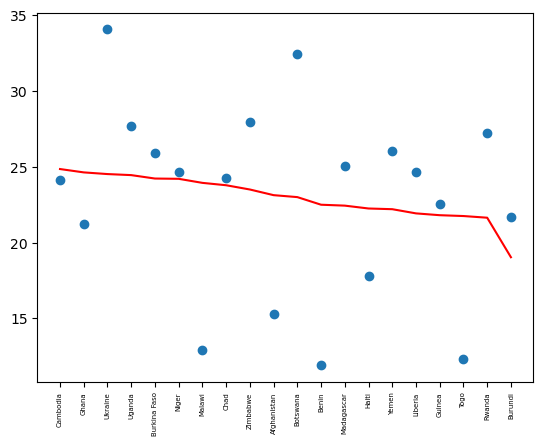

In [65]:
#scatter plots and line regression on bottom 20 happiest countries
#does getting more happiness from family and social connections correlate to a lower happiness score

#axis
x_support_bot20 = bottom_20["Country"]
y_support_bot20 = bottom_20["% of Happiness from Support"]

#data points
happy = bottom_20["happiness_score"]
country = bottom_20["Country"]

#line regression and line equation
suplast20_slope, suplast20_int, suplast20_r, suplast20_p, suplast20_std_err = st.linregress(happy, y_support_bot20)
suplast20_fit = suplast20_slope * happy + suplast20_int

#plot scatter and line regression
plt.scatter(x_support_bot20, y_support_bot20)
plt.plot(x_support_bot20, suplast20_fit, color='red')

#style xticks
plt.xticks(country, size=5, rotation=90)

#print r-values for analysis
print(f'The r-value of Support in the Bottom 20 Happiest Countries is: {suplast20_r**2}')

plt.show()

The r-value of Freedom in the Bottom 20 Happiest Countries is: 0.04466376751710391


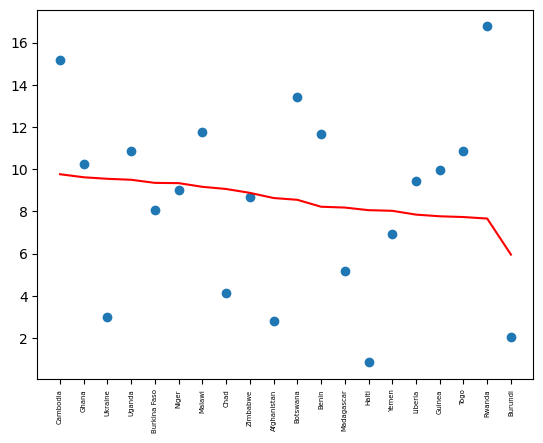

In [66]:
#scatter plots and line regression on bottom 20 happiest countries
#does getting more happiness from freedom to make life decisions correlate to a lower happiness score

#axis
x_freedom_bot20 = bottom_20["Country"]
y_freedom_bot20 = bottom_20["% of Happiness from Freedom"]

#data points
happy = bottom_20["happiness_score"]
country = bottom_20["Country"]

#line regression and line equation
freelast20_slope, freelast20_int, freelast20_r, freelast20_p, freelast20_std_err = st.linregress(happy, y_freedom_bot20)
freelast20_fit = freelast20_slope * happy + freelast20_int

#plot scatter and line regression
plt.scatter(x_freedom_bot20, y_freedom_bot20)
plt.plot(x_freedom_bot20, freelast20_fit, color='red')

#style xticks
plt.xticks(country, size=5, rotation=90)

#print r-values for analysis
print(f'The r-value of Freedom in the Bottom 20 Happiest Countries is: {freelast20_r**2}')

plt.show()

In [67]:
#mean values of the top 20
top_20.mean()

C:\Users\polly\AppData\Local\Temp\ipykernel_29068\1970740860.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_20.mean()


happiness_score                 7.150800
family                          1.469205
freedom                         0.570015
Life expectancy                81.605000
% of Happiness from Support    20.546666
% of Happiness from Freedom     7.959354
dtype: float64

In [68]:
#mean values of the bottom 20
bottom_20.mean()

C:\Users\polly\AppData\Local\Temp\ipykernel_29068\2289812695.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bottom_20.mean()


happiness_score                 3.763700
family                          0.869405
freedom                         0.324312
Life expectancy                62.810000
% of Happiness from Support    22.988221
% of Happiness from Freedom     8.543812
dtype: float64

The r-value of Support in the Top 20 Happiest Countries is: 0.016522453272880207


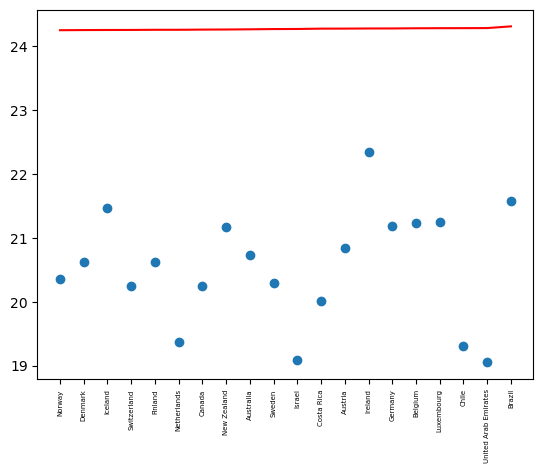

In [69]:
#axis
x_support_top20 = top_20["Country"]
y_support_top20 = top_20["% of Happiness from Support"]

#data points
life = top_20["Life expectancy "]
country = top_20["Country"]

#line regression and line equation
sup20_slope, sup20_int, sup20_r, sup20_p, sup20_std_err = st.linregress(life, y_support_top20)
sup20_fit = sup20_slope * happy + sup20_int

#plot scatter and line regression
plt.scatter(x_support_top20, y_support_top20)
plt.plot(x_support_top20, sup20_fit, color='red')

#style xticks
plt.xticks(country, size=5, rotation=90)

#print r-value for analysis
print(f'The r-value of Support in the Top 20 Happiest Countries is: {sup20_r**2}')

plt.show()

The r-value of Support in the Top 20 Happiest Countries is: 0.005237308702585996


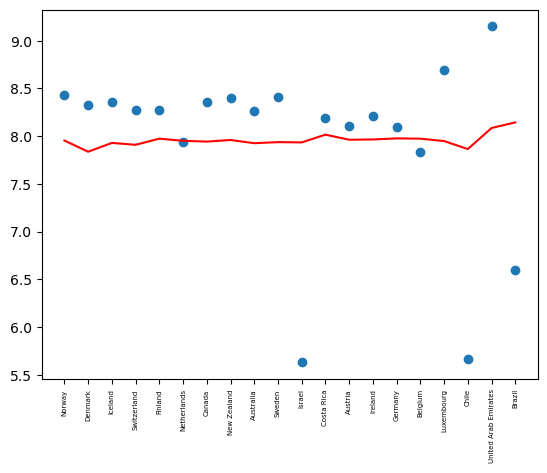

In [70]:
#axis
x_freedom_bot20 = top_20["Country"]
y_freedom_bot20 = top_20["% of Happiness from Freedom"]

#data points
life = top_20["Life expectancy "]
country = top_20["Country"]

#line regression and line equation
free20_slope, free20_int, free20_r, free20_p, free20_std_err = st.linregress(life, y_freedom_top20)
free20_fit = free20_slope * life + free20_int

#plot scatter and line regression
plt.scatter(x_freedom_top20, y_freedom_top20)
plt.plot(x_freedom_top20, free20_fit, color='red')

#style xticks
plt.xticks(country, size=5, rotation=90)

#print r-value for analysis
print(f'The r-value of Support in the Top 20 Happiest Countries is: {free20_r**2}')

plt.show()